# Import and Convert Data

In [1]:
import pandas as pd
import datetime
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv("C:/Data Science/MSC 641 Project/customer_segmentation_data.csv")
print(df.dtypes)

#Remove unnecessary words from columns for analysis
df['Behavioral Data'] = df['Behavioral Data'].str.replace('policy', '')
df['Insurance Products Owned'] = df['Insurance Products Owned'].str.replace('policy', '')
df['Segmentation Group'] = df['Segmentation Group'].str.replace('Segment', '')

def convert_date(date_str):
    # Try parsing as MM-DD-YYYY format
    try:
        return datetime.datetime.strptime(date_str, '%m-%d-%Y').strftime('%Y-%m-%d')
    except ValueError:
        pass

    # Try parsing as M/D/YYYY format
    try:
        return datetime.datetime.strptime(date_str, '%m/%d/%Y').strftime('%Y-%m-%d')
    except ValueError:
        pass

    # If neither format matches, return None or handle the error as appropriate
    return None


# Convert dates
df['Purchase History'] = df['Purchase History'].apply(convert_date)

Customer ID                            int64
Age                                    int64
Gender                                object
Marital Status                        object
Education Level                       object
Geographic Information                object
Occupation                            object
Income Level                           int64
Behavioral Data                       object
Purchase History                      object
Interactions with Customer Service    object
Insurance Products Owned              object
Coverage Amount                        int64
Premium Amount                         int64
Policy Type                           object
Customer Preferences                  object
Preferred Communication Channel       object
Preferred Contact Time                object
Preferred Language                    object
Segmentation Group                    object
dtype: object


In [3]:
pd.set_option('display.max_columns', None) #view all columns of df

object_cols = df.select_dtypes(include=['object']).columns

from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each object-type column and perform label encoding
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])
    
df.head(10)

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,0,1,0,22,3,70541,4,93,4,1,366603,2749,2,0,1,0,0,4
1,95568,26,1,4,2,10,5,54168,4,285,0,0,780236,1966,2,2,1,3,1,4
2,10544,29,0,3,0,27,3,73899,4,1152,1,2,773926,4413,2,0,2,2,2,2
3,77033,20,1,0,1,28,3,63381,4,225,0,1,787815,4342,1,4,1,1,1,2
4,88160,25,0,2,1,34,5,38794,0,233,0,3,366506,1276,1,0,4,4,0,1
5,60937,41,0,2,4,32,6,87188,4,914,0,0,570757,1106,3,4,4,0,0,3
6,37676,55,1,3,1,27,5,94891,2,1179,0,1,604069,3661,2,1,4,4,3,4
7,54100,35,1,1,4,13,0,61003,0,1288,4,2,418997,1148,0,0,3,3,0,4
8,30476,43,0,3,2,20,7,116249,0,915,3,3,319423,2612,0,1,4,4,3,1
9,39071,32,0,3,4,11,0,49083,2,779,4,0,701577,4595,2,3,0,4,0,1


# Create Charts for Exploratory Analysis

C:\Users\gaith\AppData\Local\Temp\ipykernel_2844\2834408828.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income Level'], color='g', bins=100, hist_kws={'alpha': 0.4});


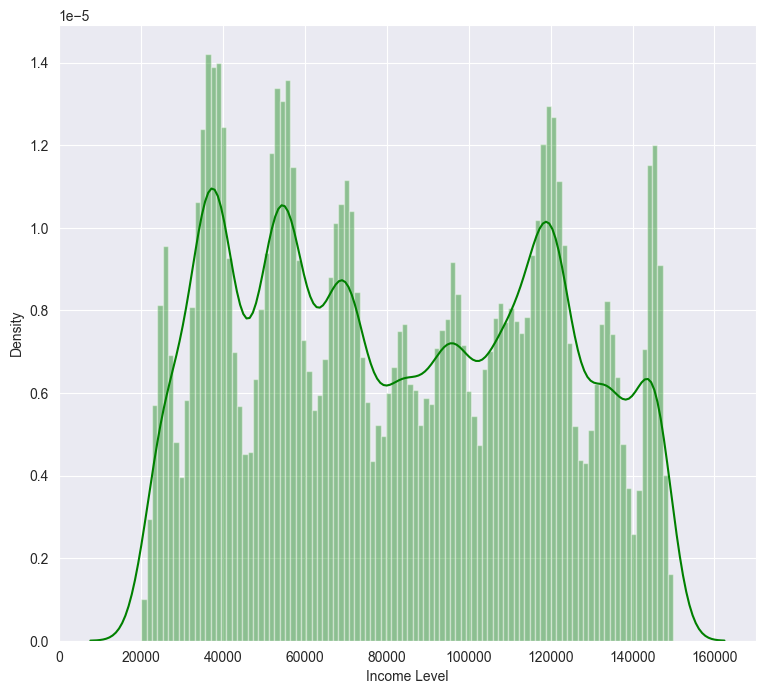

In [4]:
plt.figure(figsize=(9, 8))
sns.distplot(df['Income Level'], color='g', bins=100, hist_kws={'alpha': 0.4});

C:\Users\gaith\AppData\Local\Temp\ipykernel_2844\2724803601.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Coverage Amount'], color='g', bins=100, hist_kws={'alpha': 0.4});


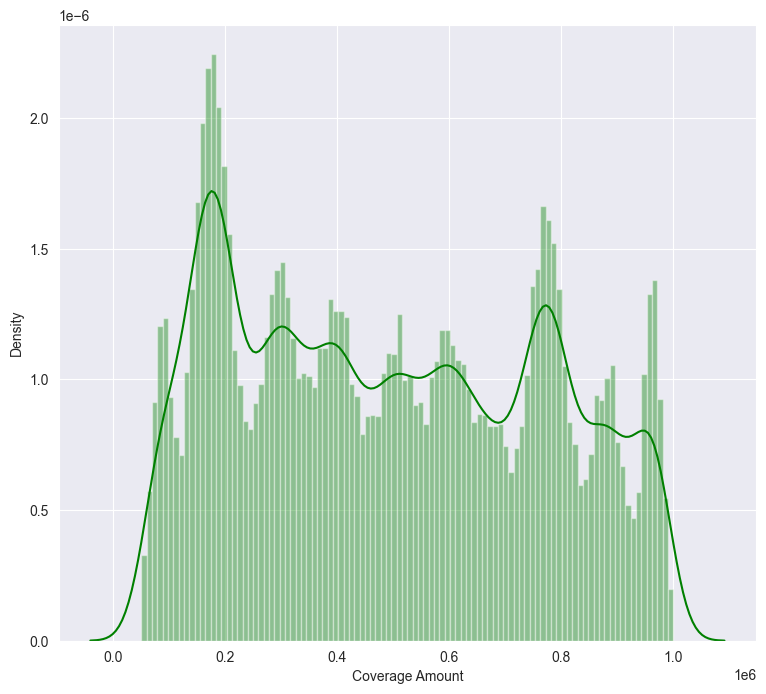

In [5]:
plt.figure(figsize=(9, 8))
sns.distplot(df['Coverage Amount'], color='g', bins=100, hist_kws={'alpha': 0.4});

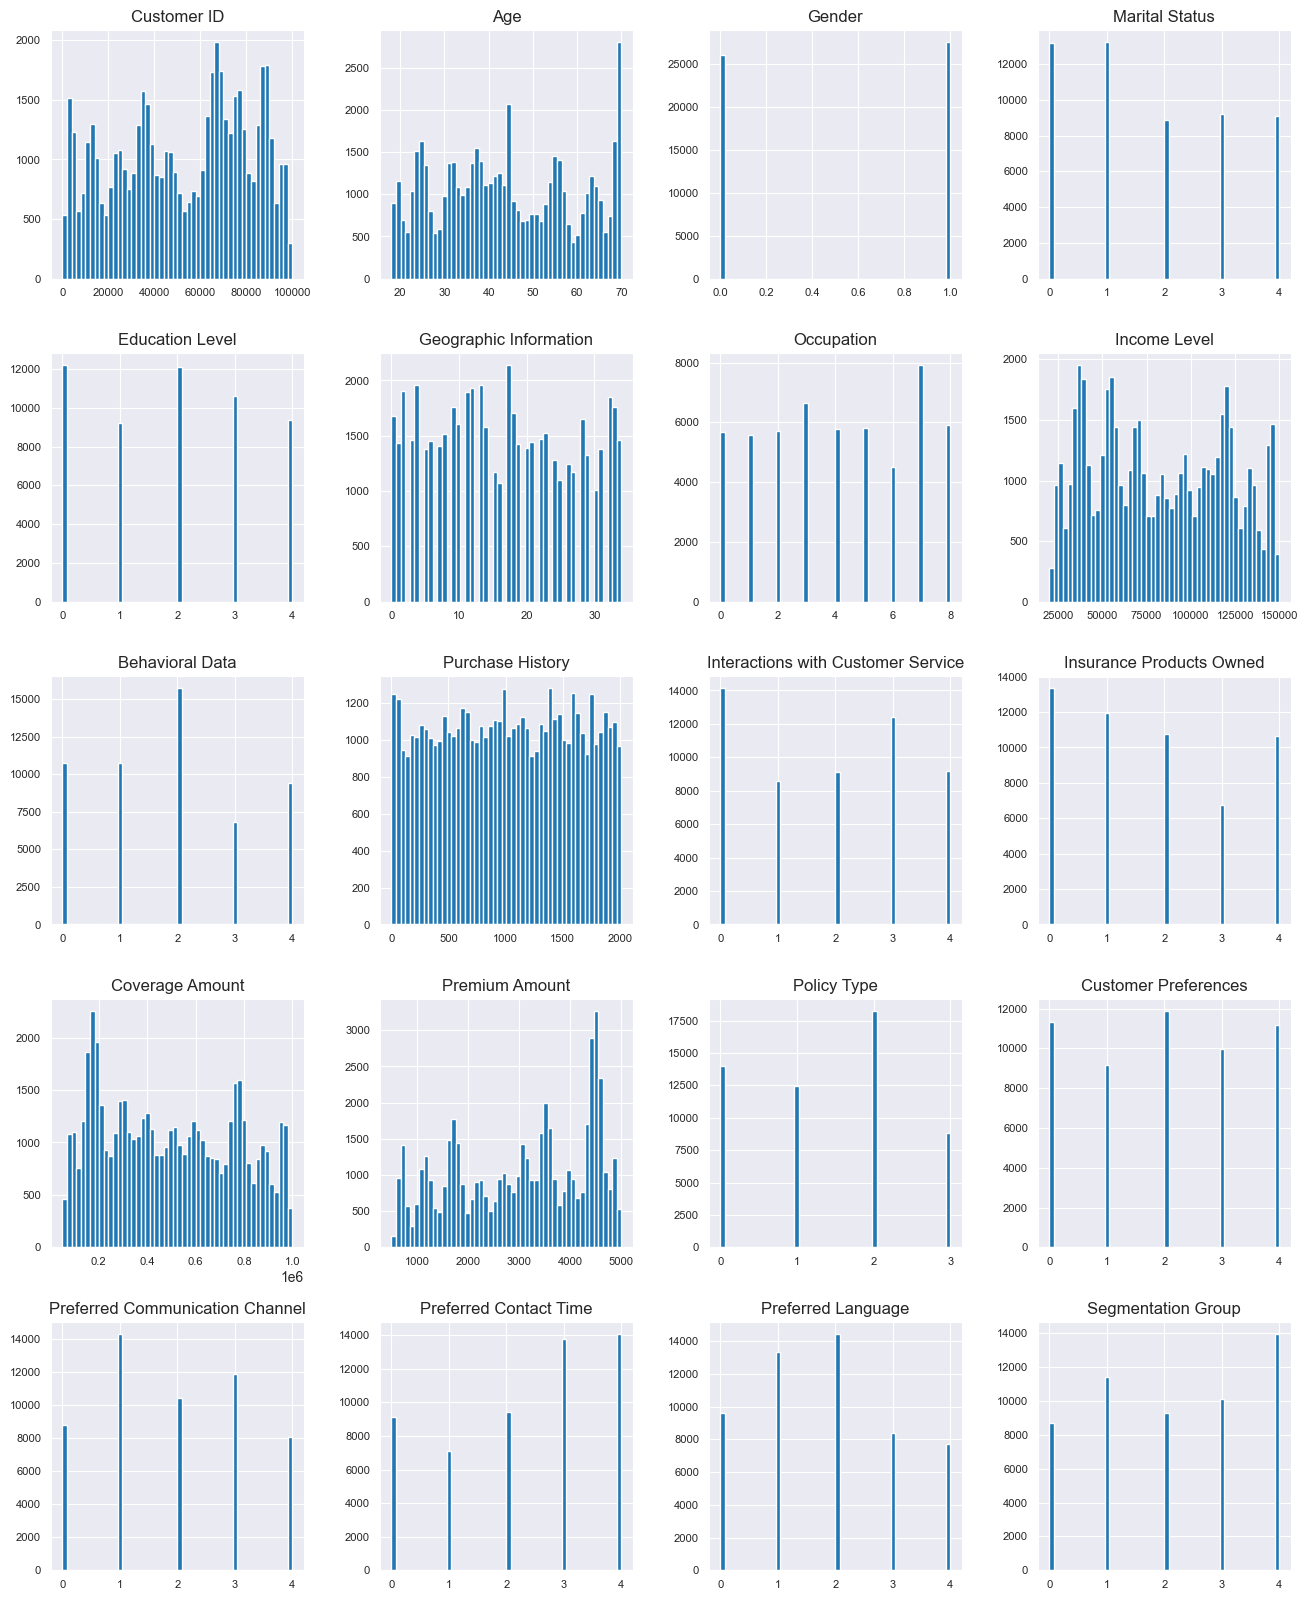

In [4]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [5]:
from sklearn.preprocessing import MinMaxScaler
#Normalize values that have dollar outputs
scaler = MinMaxScaler()

# List of columns to normalize
columns_to_normalize = ['Premium Amount', 'Income Level']

# Fit and transform these columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Check the first few rows to see the normalized data
print(df[columns_to_normalize].head())

   Premium Amount  Income Level
0        0.499778      0.388775
1        0.325778      0.262827
2        0.869556      0.414606
3        0.853778      0.333697
4        0.172444      0.144564


# Predictive Analysis

In [6]:
from imblearn.over_sampling import RandomOverSampler

x = df.drop(['Policy Type', 'Customer ID'], axis=1)
y = df['Policy Type']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

#Apply OverSampler
ros = RandomOverSampler(random_state=0)
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)

# Now apply scaling
sc = StandardScaler()
x_train_resampled = sc.fit_transform(x_train_resampled)
x_test = sc.transform(x_test)

Desicion Tree

In [9]:
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(x_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

class_names = [str(class_name) for class_name in clf.classes_]

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate AUC score
auc_score = roc_auc_score(y_test, clf.predict_proba(x_test), multi_class='ovr')
print("AUC Score:", auc_score)

Accuracy: 0.2681992337164751
Confusion Matrix:
[[ 748  628  935  494]
 [ 636  560  812  427]
 [ 932  867 1247  652]
 [ 443  427  578  315]]
AUC Score: 0.5021665947572699


<Axes: >

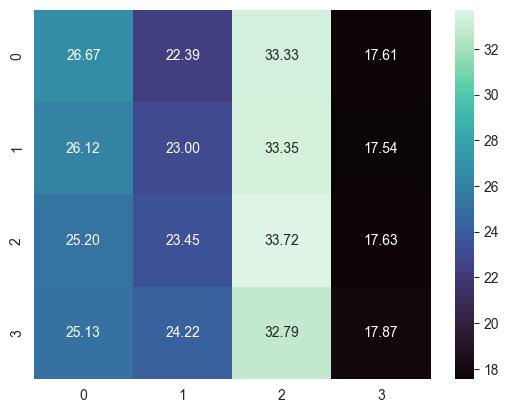

In [10]:
import seaborn as sns
normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(normalized_conf_matrix * 100, cmap='mako', annot=True, fmt=".2f")

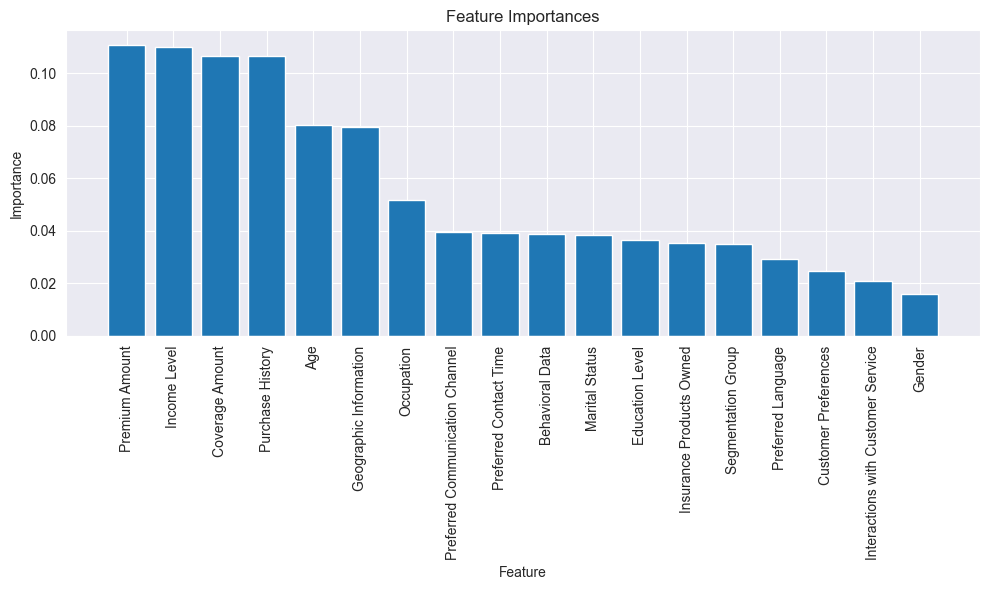

In [11]:
feature_importances = clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(x_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(x_train.shape[1]), x.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

Random Forest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

#Build Model
param_dist = {'n_estimators': randint(10,75),
              'max_depth': randint(1,10)} #parameters

clf = RandomForestClassifier()
# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(clf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(x_train_resampled, y_train_resampled)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

pred_test = best_rf.predict(x_test)  # Use original x_test here
forest_acc = accuracy_score(y_test, pred_test)
print("Test accuracy:", forest_acc)

pred_train = best_rf.predict(x_train_resampled)
print("Train accuracy:", accuracy_score(pred_train, y_train_resampled)) 

# Confusion Matrix
forest_cm = confusion_matrix(y_test, pred_test)
print("Confusion Matrix:")
print(forest_cm)

# False Negative Rate (FNR)
fnr = forest_cm[1, 0] / (forest_cm[1, 0] + forest_cm[1, 1])
print("False Negative Rate (FNR):", fnr)

# False Positive Rate (FPR)
fpr = forest_cm[0, 1] / (forest_cm[0, 0] + forest_cm[0, 1])
print("False Positive Rate (FPR):", fpr)

# Misclassification Rate (MR)
mr = (forest_cm[0, 1] + forest_cm[1, 0]) / (forest_cm[0, 0] + forest_cm[0, 1] + forest_cm[1, 0] + forest_cm[1, 1])
print("Misclassification Rate (MR):", mr)

Best hyperparameters: {'max_depth': 8, 'n_estimators': 30}
Test accuracy: 0.277357256331184
Train accuracy: 0.46568661125231847
Confusion Matrix:
[[ 777  834  570  624]
 [ 572  815  491  557]
 [ 852 1060  848  938]
 [ 387  452  396  528]]
False Negative Rate (FNR): 0.4124008651766402
False Positive Rate (FPR): 0.5176908752327747
Misclassification Rate (MR): 0.46897931954636424


<Axes: >

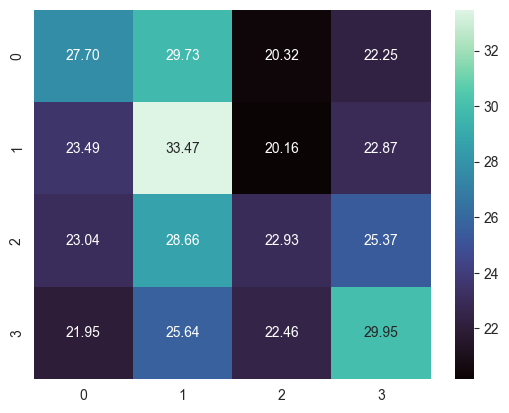

In [11]:
normalized_conf_matrix = forest_cm.astype('float') / forest_cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(normalized_conf_matrix * 100, cmap='mako', annot=True, fmt=".2f")


Gradient Boosting

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting classifier
gb_clf = GradientBoostingClassifier()

# Train the classifier
gb_clf.fit(x_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = gb_clf.predict(x_test)

# Calculate accuracy
gb_accuracy = accuracy_score(y_test, y_pred)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)

print("Train accuracy:", accuracy_score(y_train_resampled, gb_clf.predict(x_train_resampled)))

# Calculate confusion matrix
gb_conf_matrix = confusion_matrix(y_test, y_pred)
print("Gradient Boosting Classifier Confusion Matrix:")
print(gb_conf_matrix)

# Calculate AUC score
gb_auc_score = roc_auc_score(y_test, gb_clf.predict_proba(x_test), multi_class='ovr')
print("Gradient Boosting Classifier AUC Score:", gb_auc_score)

Gradient Boosting Classifier Accuracy: 0.2931501728810392
Train accuracy: 0.3684825170021296
Gradient Boosting Classifier Confusion Matrix:
[[ 814  757  568  666]
 [ 563  830  497  545]
 [ 815 1030  951  902]
 [ 373  459  389  542]]
Gradient Boosting Classifier AUC Score: 0.5604649745448642


<Axes: >

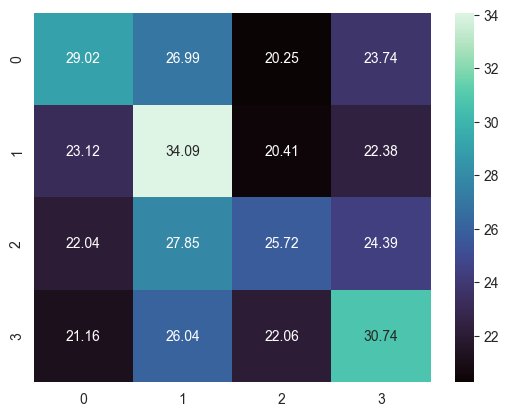

In [16]:
normalized_conf_matrix = gb_conf_matrix.astype('float') / gb_conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(normalized_conf_matrix * 100, cmap='mako', annot=True, fmt=".2f")

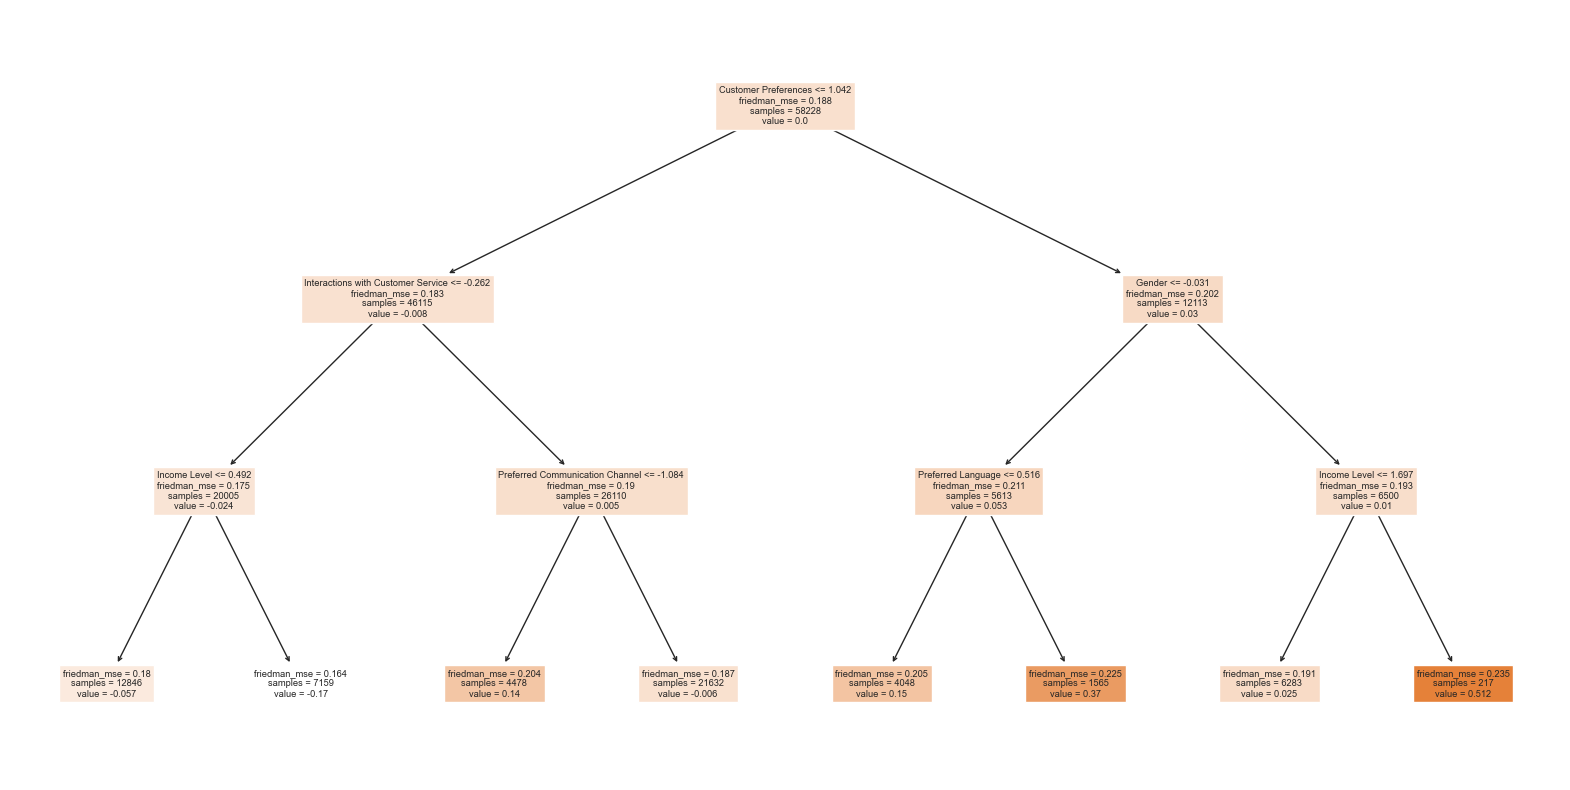

In [17]:
# Plot the first tree in the ensemble
plt.figure(figsize=(20, 10))
plot_tree(gb_clf.estimators_[0, 0], filled=True, feature_names=x.columns, class_names=gb_clf.classes_)
plt.show()

In [18]:
import xgboost as xgb

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier()

# Train the classifier
xgb_clf.fit(x_train_resampled, y_train_resampled)

# Make predictions on the test set
xgb_y_pred = xgb_clf.predict(x_test)

# Calculate accuracy
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print("XGBoost Classifier Accuracy:", xgb_accuracy)

# Calculate confusion matrix
xgb_conf_matrix = confusion_matrix(y_test, xgb_y_pred)
print("XGBoost Classifier Confusion Matrix:")
print(xgb_conf_matrix)

# Calculate AUC score
xgb_auc_score = roc_auc_score(y_test, xgb_clf.predict_proba(x_test), multi_class='ovr')
print("XGBoost Classifier AUC Score:", xgb_auc_score)

XGBoost Classifier Accuracy: 0.2917484347257266
XGBoost Classifier Confusion Matrix:
[[ 804  687  777  537]
 [ 602  698  671  464]
 [ 896  904 1199  699]
 [ 416  408  518  421]]
XGBoost Classifier AUC Score: 0.5437028865946943


<Axes: >

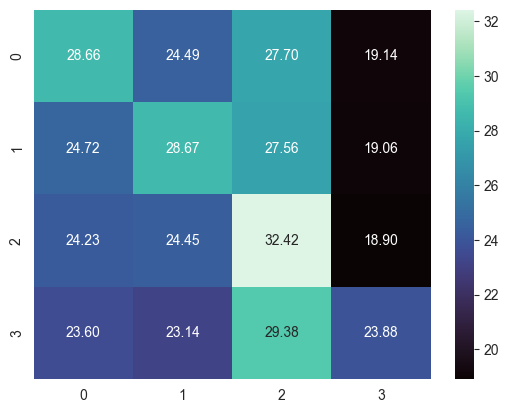

In [19]:
normalized_conf_matrix = xgb_conf_matrix.astype('float') / xgb_conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(normalized_conf_matrix * 100, cmap='mako', annot=True, fmt=".2f")

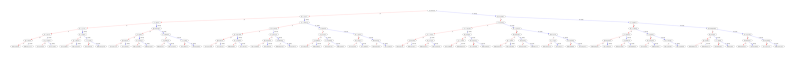

In [20]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the tree, which modifies the ax object
xgb.plot_tree(xgb_clf, num_trees=1, ax=ax)
 
# Save the figure, not the axis
fig.savefig('C:/Data Science/MSC 641 Project/gradient_tree.png', dpi=900)

Optimized Gradient Boost

In [26]:
from sklearn.preprocessing import LabelEncoder

# Define the parameter grid
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],  # Range of values for max_depth
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]  # Range of values for learning_rate
}

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(objective="binary:logistic", eval_metric=["logloss", "error"], use_label_encoder=False)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(x_train_resampled, y_train_resampled)

# Best model after grid search
best_model = grid_search.best_estimator_

# Evaluate on test data
xgb_y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, xgb_y_pred)
print("Best model accuracy on test data: {:.2f}%".format(accuracy * 100))
print("Best parameters found: ", grid_search.best_params_)

# Calculate confusion matrix
xgb_conf_matrix = confusion_matrix(y_test, xgb_y_pred)
print("XGBoost Classifier Confusion Matrix:")
print(xgb_conf_matrix)

# Calculate AUC score
xgb_auc_score = roc_auc_score(y_test, best_model.predict_proba(x_test), multi_class='ovr', average='weighted')
print("XGBoost Classifier AUC Score:", xgb_auc_score)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best model accuracy on test data: 29.52%
Best parameters found:  {'learning_rate': 0.3, 'max_depth': 7}
XGBoost Classifier Confusion Matrix:
[[ 807  681  887  430]
 [ 606  641  768  420]
 [ 926  846 1352  574]
 [ 435  386  583  359]]
XGBoost Classifier AUC Score: 0.5311887302005017


SVM Model

In [7]:
parameter = [{'kernel': ['linear']},
            {'kernel' : ['poly'], 'degree': [2, 3, 4]},
            {'kernel' : ['rbf']}]

grid_search = GridSearchCV(estimator=SVC(), param_grid=parameter, scoring='accuracy') 
grid_search = grid_search.fit(x_train_resampled, y_train_resampled)

best_kernel = grid_search.best_params_['kernel']
print("Best Kernel:", best_kernel)

classifier = SVC(kernel=best_kernel)
classifier.fit(x_train_resampled, y_train_resampled)
y_pred = classifier.predict(x_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Metrics
accuracy_svm_kernel = accuracy_score(y_pred, y_test)
print("Test accuracy for SVM:",accuracy_svm_kernel)

TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

FNR = FN / (FN + TP)
FPR = FP / (FP + TN)
MR = (FP + FN) / (TP + TN + FP + FN)

print("False Negative Rate (FNR):", FNR)
print("False Positive Rate (FPR):", FPR)
print("Misclassification Rate (MR):", MR)

Best Kernel: poly
Confusion Matrix:
[[776 727 614 688]
 [628 650 528 629]
 [940 960 827 971]
 [472 400 416 475]]
Test accuracy for SVM: 0.2549294458461826
False Negative Rate (FNR): 0.49139280125195617
False Positive Rate (FPR): 0.48369926813040587
Misclassification Rate (MR): 0.48723480762315713


<Axes: >

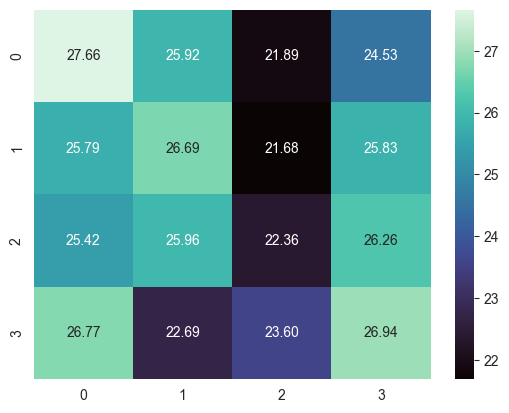

In [8]:
normalized_conf_matrix = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(normalized_conf_matrix * 100, cmap='mako', annot=True, fmt=".2f")

Stacking Model

In [35]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(kernel='rbf', probability=True, random_state=42)),
    ('gbc', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

# Define meta-model
meta_model = LogisticRegression(random_state=42)

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacking classifier
stacking_classifier.fit(x_train_resampled, y_train_resampled)

# Make predictions and evaluate the model
final_predictions = stacking_classifier.predict(x_test)
print("Accuracy:", accuracy_score(y_test, final_predictions))

Accuracy: 0.3398747780581254


Data Preprocessing for Linear Regression (Not Included in Report)

In [36]:
print(df.columns)

Index(['Customer ID', 'Age', 'Gender', 'Marital Status', 'Education Level',
       'Geographic Information', 'Occupation', 'Income Level',
       'Behavioral Data', 'Purchase History',
       'Interactions with Customer Service', 'Insurance Products Owned',
       'Coverage Amount', 'Premium Amount', 'Policy Type',
       'Customer Preferences', 'Preferred Communication Channel',
       'Preferred Contact Time', 'Preferred Language', 'Segmentation Group'],
      dtype='object')


In [37]:
lr_df = df.drop(['Customer ID', 'Customer Preferences', 'Preferred Communication Channel', 'Preferred Contact Time', 'Preferred Language'], axis=1)
x = lr_df.drop(['Coverage Amount'], axis=1)
y = lr_df['Coverage Amount'] #predicting coverage amount
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [38]:
import numpy as np

# Assuming x_test is a NumPy array with NaN values
mean_values = np.nanmean(x_test, axis=0)  # Compute mean excluding NaNs for each column
inds = np.where(np.isnan(x_test))  # Get the indices where NaNs are present
x_test[inds] = np.take(mean_values, inds[1])

In [39]:
np.any(np.isnan(x_test)), np.all(np.isfinite(x_test))

(False, True)

In [40]:
#Due to infinite values rescaling is conducted so that errors will not occur when building TensorFlow model
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(x_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 72695368180.39368
R-squared: 0.00035456459878124846


Random Forest Regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

# Train the classifier
rfr.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rfr.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 235672.34186898422
Mean Squared Error: 73784691307.25023
Root Mean Squared Error: 271633.37664442166
R-squared: -0.014624888957832427


C:\Users\gaith\PycharmProjects\Customer Segmentation\.venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gradient Boosting

In [43]:
# Initialize XGBoost classifier
from xgboost import XGBRegressor

xgb_rfr = XGBRegressor()

# Train the classifier
xgb_rfr.fit(x_train, y_train)

# Make predictions on the test set
xgb_y_pred = xgb_rfr.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 235672.34186898422
Mean Squared Error: 73784691307.25023
Root Mean Squared Error: 271633.37664442166
R-squared: -0.014624888957832427


C:\Users\gaith\PycharmProjects\Customer Segmentation\.venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
